In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected = True)
from scipy.stats import linregress
from scipy import stats

In [2]:
# read in csv files
df = pd.read_csv('complete_data_final.csv')
global_df = pd.read_csv('global_data_final.csv')

In [3]:
# show complete_data_final dataframe
df.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
0,1,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Australia,Australia,23
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
4,5,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,North America,Canada,12


In [4]:
#list artists and number of unique countries they had top songs in
artist_country = pd.DataFrame({"Artist_clean": df['Artist_clean'],
                                "Country": df['Country']
})
artist_country = artist_country.groupby(['Artist_clean']).nunique()[('Country')].sort_values(ascending=False)
artist_country = pd.DataFrame(artist_country)

artist_country.head()

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52


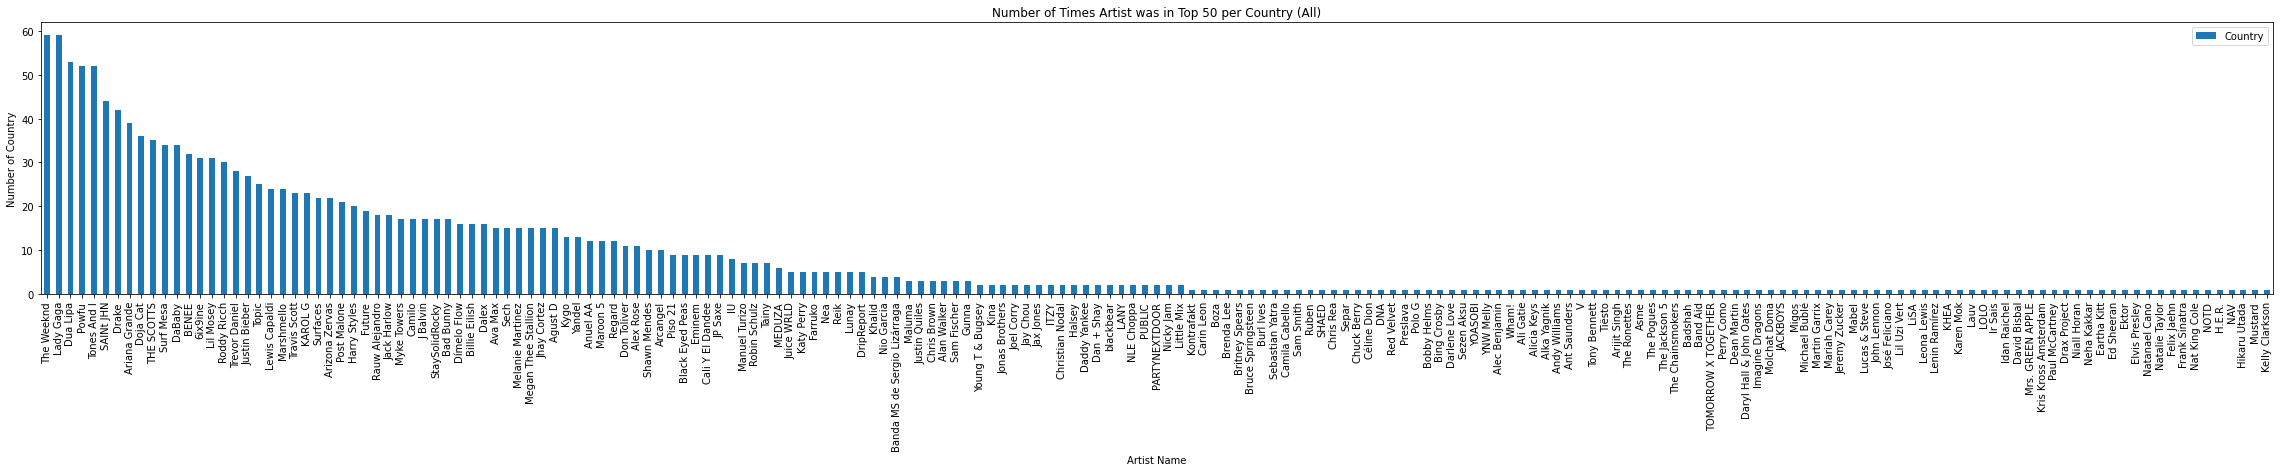

In [5]:
# plot data in a bar chart
artist_country.plot(kind="bar", figsize=(40,5))
plt.ylabel("Number of Country")
plt.xlabel("Artist Name")
plt.title("Number of Times Artist was in Top 50 per Country (All)")
plt.savefig("Images/country_per_artist_all.png")

In [6]:
# drop artists who only appeared in top charts less than 10 times overall
artist_country_drop = artist_country.loc[artist_country['Country'] > 10]

artist_country_drop = artist_country_drop[('Country')].sort_values(ascending=False)

artist_country_drop = pd.DataFrame(artist_country_drop)

artist_country_drop.head()

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52


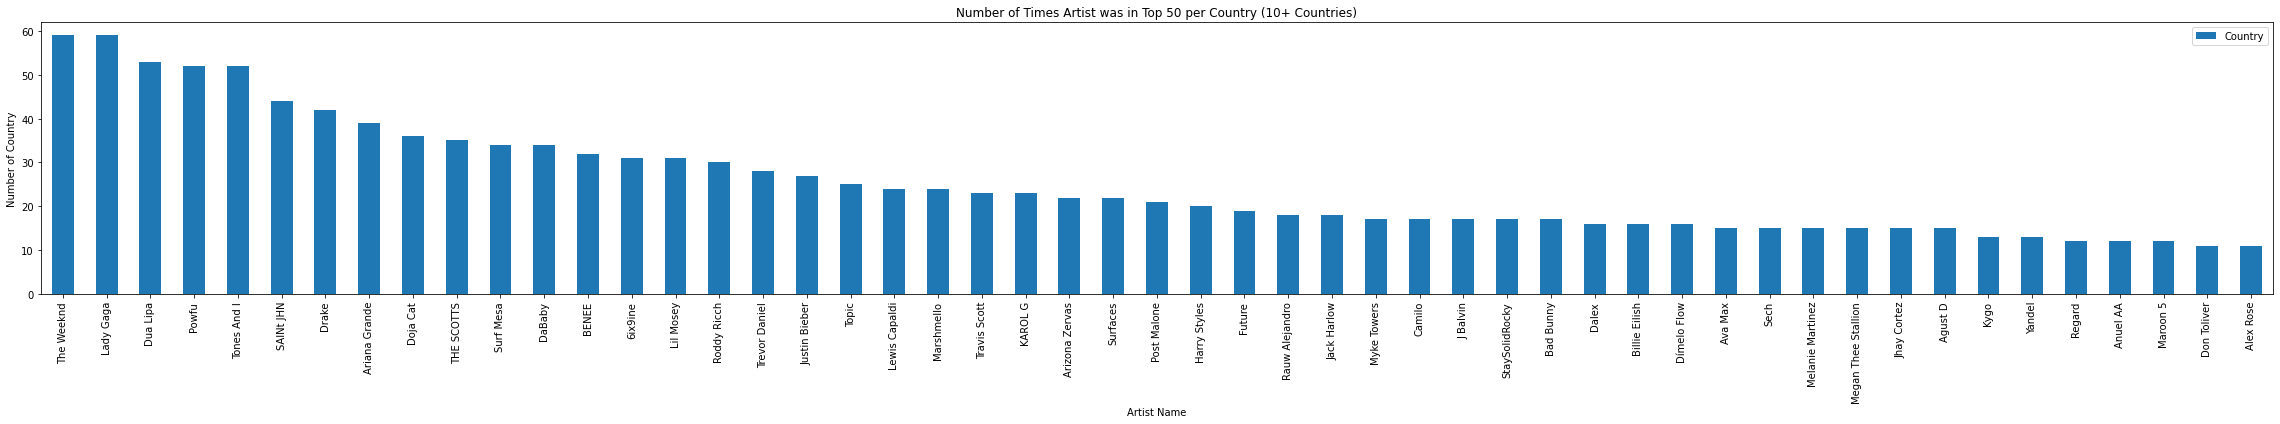

In [7]:
# plot data with dropped artists in a bar chart
artist_country_drop.plot(kind="bar", figsize=(40,5))
plt.ylabel("Number of Country")
plt.xlabel("Artist Name")
plt.title("Number of Times Artist was in Top 50 per Country (10+ Countries)")
plt.savefig("Images/country_per_artist_10_plus.png")

In [8]:
# Grab top ten artists
top_ten_artist = artist_country_drop.iloc[:10]
top_ten_artist

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52
SAINt JHN,44
Drake,42
Ariana Grande,39
Doja Cat,36


In [9]:
# make top_ten_artist dataframe into a list
top_artist_names = top_ten_artist.index.values.tolist()
top_artist_count = top_ten_artist.values.tolist()
top_artist_names

['The Weeknd',
 'Lady Gaga',
 'Dua Lipa',
 'Powfu',
 'Tones And I',
 'SAINt JHN',
 'Drake',
 'Ariana Grande',
 'Doja Cat',
 'THE SCOTTS']

In [10]:
#pull in global data
global_df.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
0,0,0.117880,0.737200,155645.800000,0.680600,0.000000,0.159800,-5.112000,72.000000,0.279000,118.218400,0.434200,1.000000,1.0,6ix9ine,GOOBA,Global,Global,11
1,32,0.022900,0.650000,225668.000000,0.827000,0.000000,0.121000,-4.014000,76.000000,0.059900,144.995000,0.223000,1.000000,1.0,Agust D,D-2,Global,Global,48
2,107,0.246006,0.637926,203550.123457,0.585704,0.000687,0.177021,-6.001111,70.938272,0.101638,118.821025,0.464933,0.382716,1.0,Ariana Grande,Stuck with U,Global,Global,9
3,153,0.152625,0.674250,181060.750000,0.620000,0.000002,0.238500,-5.962500,74.000000,0.165825,108.327000,0.484750,1.000000,1.0,Arizona Zervas,ROXANNE,Global,Global,34
4,200,0.195650,0.832000,201813.500000,0.610000,0.000015,0.142500,-4.923000,77.500000,0.050950,122.955500,0.698500,0.500000,1.0,BENEE,STELLA & STEVE,Global,Global,16


''

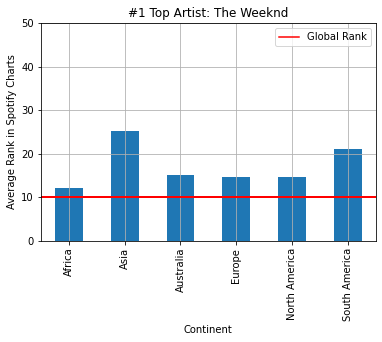

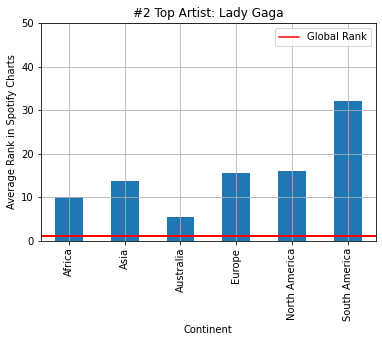

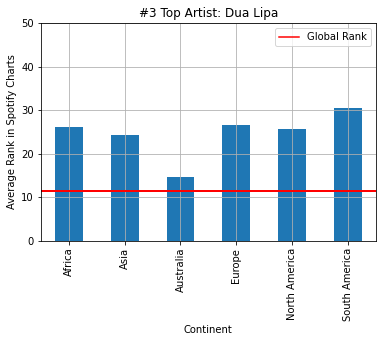

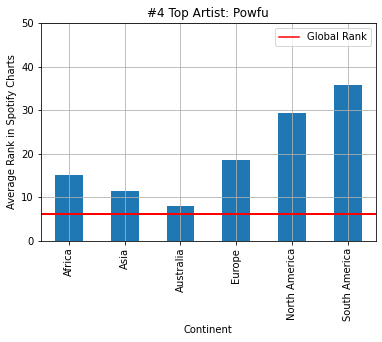

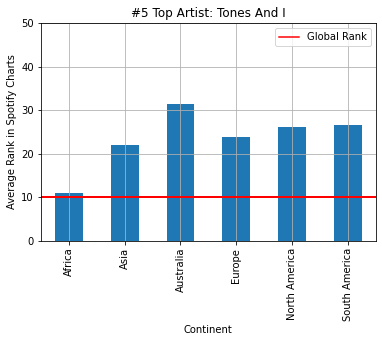

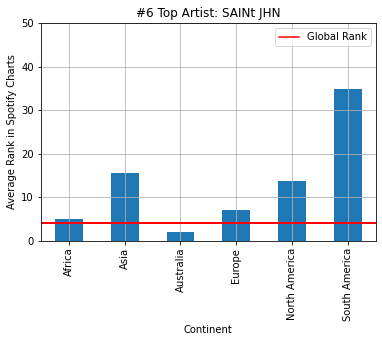

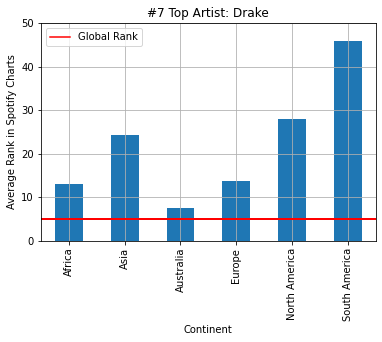

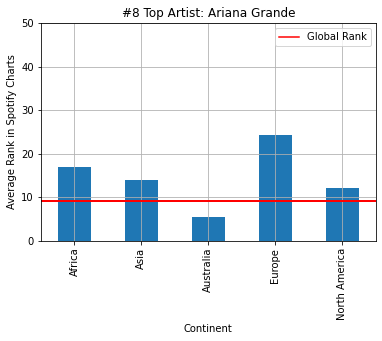

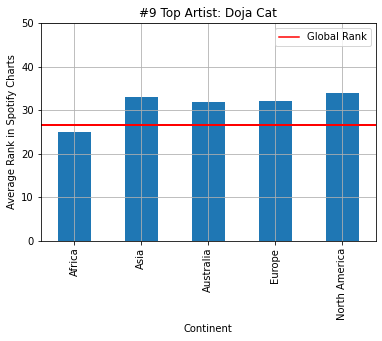

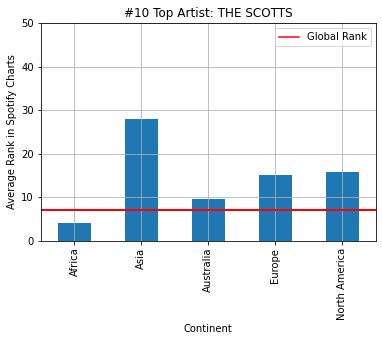

In [11]:
# # for loop to loop through top ten artists by rank 
index = 0

for name in top_artist_names:
    index += 1
    artist_name = df.loc[df['Artist_clean'] == name, ['Continent', 'Artist_clean', 'Rank']]
    artist_name = artist_name.groupby(['Continent']).mean()
    artist_name.plot(kind='bar')
    plt.title(f'#{index} Top Artist: {name}')
    plt.xlabel("Continent")
    plt.ylabel("Average Rank in Spotify Charts")
    plt.grid()
    plt.ylim(0,50)
    
    for artist_name in top_artist_names:
        global_artist_name = global_df.loc[global_df['Artist_clean'] == name, ['Artist_clean', 'Rank']].mean()
        rank = global_artist_name['Rank']
        plt.axhline(y=rank, color='r', linestyle='-')
        plt.legend(['Global Rank'])
    plt.savefig(f"Images/{index} Top Artist: {name}.png")
;

In [12]:
artist_name = df.loc[df['Artist_clean'] == "The Weeknd", ['Country', 'Rank']].set_index('Country')['Rank'].sort_values(ascending=True)
artist_name

Country
South Africa       1
Czech Republic     1
Lithuania          1
Belgium            1
Sweden             1
                  ..
Malta             48
United Kingdom    49
Indonesia         50
Uruguay           50
Vietnam           50
Name: Rank, Length: 85, dtype: int64

''

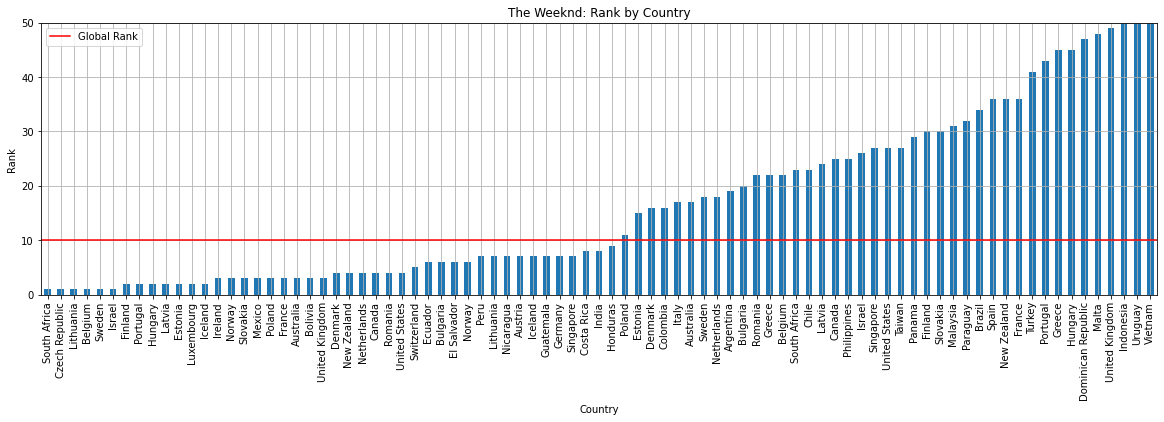

In [14]:
# # for loop to loop through top ten artists by rank 
artist_name.plot(kind='bar', figsize=(20,5))
plt.title(f'The Weeknd: Rank by Country')
plt.xlabel("Country")
plt.ylabel("Rank")
plt.grid()
plt.ylim(0,50)
    
global_artist_name = global_df.loc[global_df['Artist_clean'] == 'The Weeknd', ['Artist_clean', 'Rank']].mean()
rank = global_artist_name['Rank']
plt.axhline(y=rank, color='r', linestyle='-')
plt.legend(['Global Rank'])
plt.savefig(f"Images/weeknd_complete_rank.png")
;

In [15]:
#list artists and rank in global chart
artist_global = pd.DataFrame({"Artist_clean": global_df['Artist_clean'],
                                "Rank": global_df['Rank']
})

artist_global= artist_global.set_index('Artist_clean')['Rank'].sort_values(ascending=True)

artist_global.head()

Artist_clean
Lady Gaga     1
The Weeknd    2
DaBaby        3
SAINt JHN     4
Drake         5
Name: Rank, dtype: int64

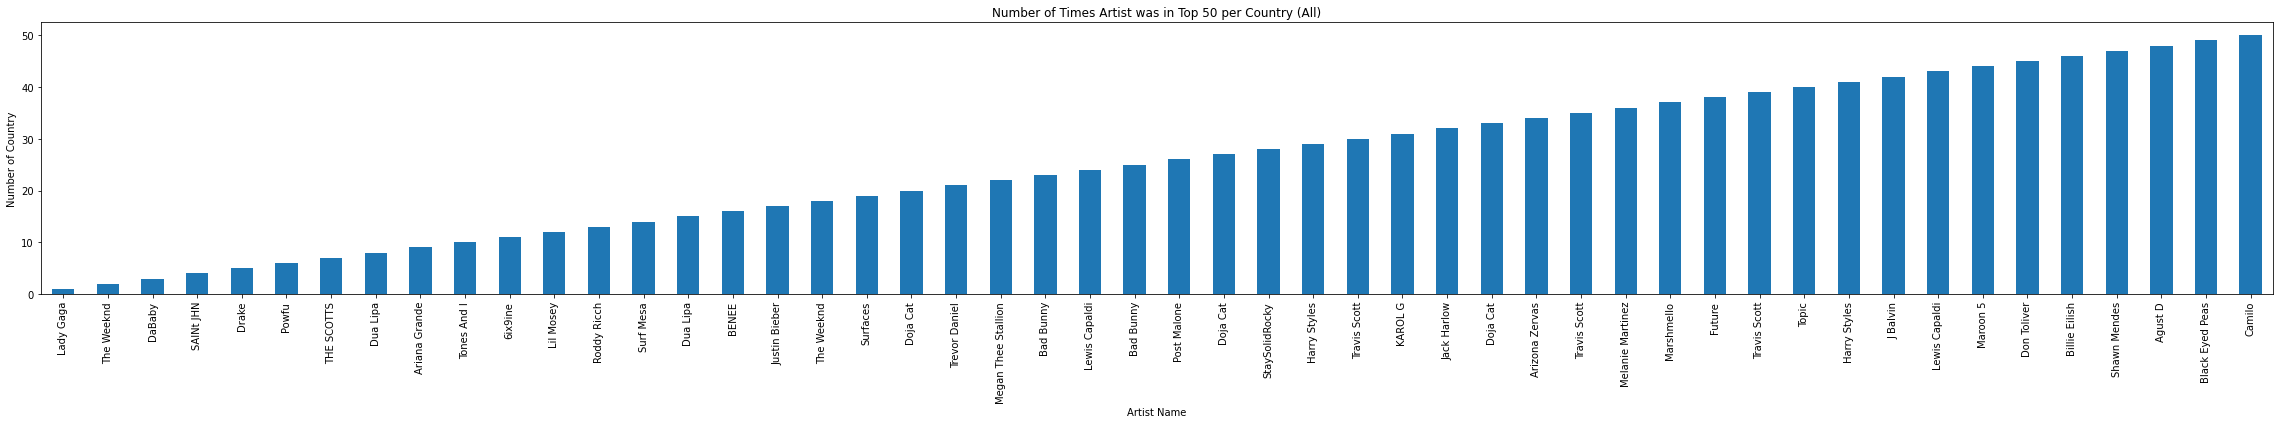

In [16]:
# plot global data in a bar chart
artist_global.plot(kind="bar", figsize=(40,5))
plt.ylabel("Number of Country")
plt.xlabel("Artist Name")
plt.title("Number of Times Artist was in Top 50 per Country (All)")
plt.savefig("Images/global_artist.png")

In [17]:
# gab top ten artist by rank
df_rank = df.query('Rank < 11')

df_rank.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
5,6,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Czech Republic,3
6,7,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Denmark,7


In [18]:
# create new dataframe
df_country_cont = df_rank[['Continent','Country','Acousticness', 'Danceability', 'Duration Ms', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Popularity', 'Speechiness',
       'Tempo', 'Valence', 'Explicit', 'Rank']]

df_country_cont = df_country_cont.groupby(['Country',]).mean()

df_country_cont.reset_index()


df_country_cont.head(10)

,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Rank
Country,,,,,,,,,,,,,
Argentina,0.230130,0.788598,210456.433086,0.658825,0.000248,0.132479,-4.775223,70.497963,0.119530,128.319877,0.664361,0.448210,6.000000
Australia,0.177392,0.719125,207097.042130,0.642492,0.001575,0.213535,-5.970151,71.711111,0.127020,118.228371,0.534455,0.538016,5.500000
Austria,0.146579,0.706678,199392.380036,0.661740,0.002514,0.222627,-6.494229,71.579212,0.168273,119.363542,0.453838,0.760466,6.333333
Belgium,0.181817,0.726764,199172.923570,0.666083,0.001876,0.206602,-6.210259,68.516559,0.151513,118.782613,0.496916,0.523526,5.666667
Bolivia,0.303299,0.749328,237837.461639,0.645104,0.000733,0.144015,-5.526982,70.341378,0.127058,133.087560,0.630675,0.538860,5.125000
Brazil,0.079378,0.696809,235610.531915,0.753809,0.001748,0.211655,-4.970957,59.340426,0.056194,119.323766,0.577213,0.148936,3.000000
Bulgaria,0.159799,0.724314,201447.976516,0.633599,0.001874,0.194445,-6.427780,69.908780,0.153874,121.841150,0.455178,0.838967,5.500000
Canada,0.214974,0.721691,197693.296892,0.598906,0.001568,0.222795,-6.886085,71.220851,0.136158,118.973949,0.446032,0.759445,5.500000
Chile,0.256380,0.774166,232313.091481,0.653982,0.000184,0.135235,-5.414334,71.088519,0.126878,125.176463,0.493861,0.703519,5.555556


The r-squared is: 0.03547623651451005


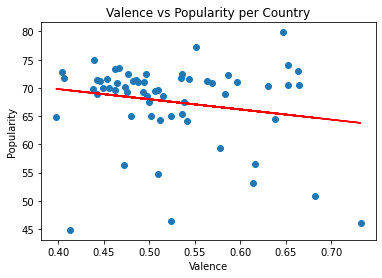

<Figure size 432x288 with 0 Axes>

In [19]:
# correlation between valence and popularity
x_values = df_country_cont['Valence']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Valence vs Popularity per Country")
plt.xlabel('Valence')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/pop_val_scatter.png")

The r-squared is: 0.10274161293471054


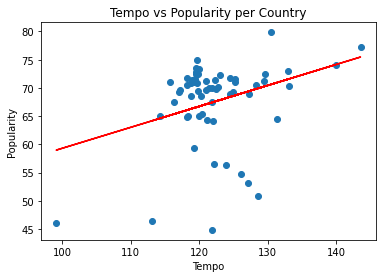

<Figure size 432x288 with 0 Axes>

In [20]:
# correlation between tempo and popularity
x_values = df_country_cont['Tempo']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Tempo vs Popularity per Country")
plt.xlabel('Tempo')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/pop_tempo_scatter.png")

The r-squared is: 0.031701428805754904


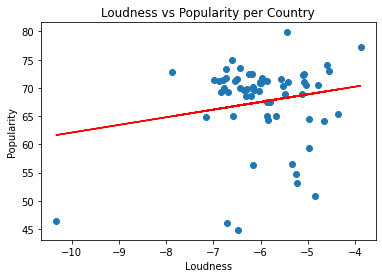

<Figure size 432x288 with 0 Axes>

In [21]:
# correlation between loudness and popularity
x_values = df_country_cont['Loudness']
y_values = df_country_cont['Popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Loudness vs Popularity per Country")
plt.xlabel('Loudness')
plt.ylabel('Popularity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/pop_loudness_scatter.png")

In [22]:
# create new dataframe
df_artist_rank = df[['Artist_clean', 'Acousticness', 'Danceability', 'Duration Ms', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Popularity', 'Speechiness',
       'Tempo', 'Valence', 'Explicit', 'Rank']]

df_artist_rank = df_artist_rank.groupby(['Artist_clean',]).mean()

df_artist_rank.reset_index()


df_artist_rank.head(10)

,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Rank
Artist_clean,,,,,,,,,,,,,
6ix9ine,0.117880,0.737200,155645.800000,0.680600,0.000000,0.159800,-5.112000,72.000000,0.279000,118.218400,0.434200,1.0,12.870968
Agust D,0.022900,0.650000,225668.000000,0.827000,0.000000,0.121000,-4.014000,76.000000,0.059900,144.995000,0.223000,1.0,30.096774
Alan Walker,0.152325,0.625545,208313.909091,0.668364,0.040175,0.208245,-5.045545,61.636364,0.051136,129.792909,0.403545,0.0,30.666667
Alec Benjamin,0.541000,0.652800,188065.000000,0.573000,0.000221,0.175600,-5.940400,74.000000,0.054420,142.721200,0.644000,0.0,40.000000
Alex Rose,0.207000,0.686500,313640.000000,0.564500,0.000012,0.086600,-5.689500,78.000000,0.092300,92.017000,0.545500,0.0,22.818182
Ali Gatie,0.592500,0.735750,207456.250000,0.430250,0.000002,0.108775,-8.853000,73.750000,0.062350,108.137750,0.365000,0.0,29.000000
Alicia Keys,0.370989,0.577684,260877.894737,0.591632,0.021419,0.139742,-7.470000,59.947368,0.089632,110.501000,0.342858,0.0,41.000000
Alka Yagnik,0.658000,0.551500,331120.000000,0.455500,0.000213,0.148975,-12.038250,37.500000,0.066825,129.276000,0.681000,0.0,44.000000
Andy Williams,0.780729,0.320297,172324.779661,0.308286,0.013732,0.191285,-13.209856,29.983051,0.035009,106.475814,0.375175,0.0,3.000000


y = 2.58x +28.22
The r-value is: 0.0007640423231120749


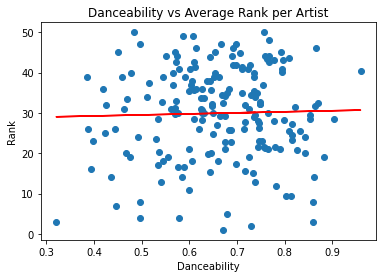

In [23]:
#Scatter plot analyzing musicalities by rank
x_values = df_artist_rank['Danceability']
y_values = df_artist_rank['Rank']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Danceability vs Average Rank per Artist")
plt.xlabel('Danceability')
plt.ylabel('Rank')

print(f"The r-value is: {rvalue**2}")

plt.savefig('DancevRank.png')
plt.show()

y = -0.68x +30.35
The r-value is: 9.579366500530684e-05


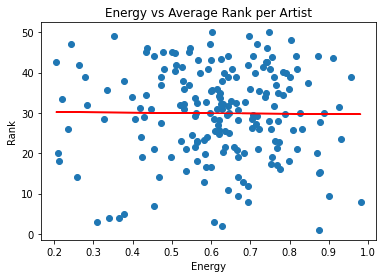

In [24]:
#Scatter plot analyzing musicalities by rank
x_values = df_artist_rank['Energy']
y_values = df_artist_rank['Rank']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Energy vs Average Rank per Artist")
plt.xlabel('Energy')
plt.ylabel('Rank')

print(f"The r-value is: {rvalue**2}")

plt.savefig('EnergyvRank.png')
plt.show()